***Phaze1***

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer  

# df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df = pd.read_csv('diabetes.csv')
# print(df.head(1))
print(df.describe())
print(df.info())
# label
print(df.columns)
features = list(df.columns)[:-1]
features

       Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count   635.000000   654.000000     680.000000     624.000000  680.000000   
mean      3.700787   113.422018      68.786765      20.386218   80.123529   
std       3.518126   202.816831      19.724841      15.987049  115.681140   
min     -22.000000 -5000.000000      -2.000000       0.000000    0.000000   
25%       1.000000    99.000000      62.000000       0.000000    0.000000   
50%       3.000000   117.000000      72.000000      23.000000   34.000000   
75%       6.000000   140.750000      80.000000      32.000000  129.250000   
max      17.000000   199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  684.000000                590.000000  655.000000  768.000000  
mean    32.083626                  0.466676   33.157252    0.348958  
std      7.800741                  0.322408   13.829831    0.476951  
min      0.000000         

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [4]:
# 2
# print(df.head(5).value_counts())
# print(df.value_counts())
# for col in list(df.columns):
#   print(df[col].value_counts())

# print(list(df['Pregnancies'].value_counts()))
# print(df.iloc[:,0].value_counts().values)
# print(df.iloc[:,0].value_counts().axes[0])
# print(df.iloc[:,0].value_counts().index)

col_count = df.count()
col_na = df.apply(lambda col: col.isna().sum())
print(df.index)
# print(df.__len__())
print(col_count + col_na)
print("missing count")
print(col_na)
print("real_value count")
print(col_count)
# print(df.index.size)
print("missing values raito:")
print(col_na / df.index.stop * 100)


RangeIndex(start=0, stop=768, step=1)
Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64
missing count
Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64
real_value count
Pregnancies                 635
Glucose                     654
BloodPressure               680
SkinThickness               624
Insulin                     680
BMI                         684
DiabetesPedigreeFunction    590
Age                         655
Outcome                     768
dtype: int64
missing values raito:
Pregna

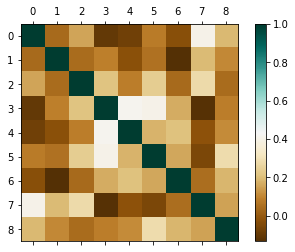

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.040599,0.155785,-0.098937,-0.072376,0.079750,-0.024125,0.402658,0.193306
Glucose,0.040599,1.000000,0.047252,0.088426,-0.021762,0.058295,-0.133734,0.197025,0.105518
BloodPressure,0.155785,0.047252,1.000000,0.211791,0.084323,0.238654,0.041520,0.281144,0.044803
SkinThickness,-0.098937,0.088426,0.211791,1.000000,0.417427,0.403505,0.167657,-0.127505,0.086170
Insulin,-0.072376,-0.021762,0.084323,0.417427,1.000000,0.181752,0.208929,-0.017504,0.112239
BMI,0.079750,0.058295,0.238654,0.403505,0.181752,1.000000,0.161370,-0.053359,0.284374
DiabetesPedigreeFunction,-0.024125,-0.133734,0.041520,0.167657,0.208929,0.161370,1.000000,0.049148,0.186958
Age,0.402658,0.197025,0.281144,-0.127505,-0.017504,-0.053359,0.049148,1.000000,0.152902
Outcome,0.193306,0.105518,0.044803,0.086170,0.112239,0.284374,0.186958,0.152902,1.000000


In [5]:
# 3
#plot correlation matrix
fid, ax = plt.subplots()
correlation = df.corr()  
color_matrix = ax.matshow(correlation, cmap = 'BrBG')
plt.colorbar(color_matrix)
pic = correlation.style.background_gradient(cmap = 'BrBG')
plt.show()
pic
# print(list(correlation.values))
# print(list(correlation.values.flat))
# plt.colorbar(list(correlation.values.flat)) 
# list(df)
# res = df.apply(lambda col: list(zip(col.value_counts().index, list(col.value_counts()))))
# print(res[0])
# t1 = sorted(res[0])
# print(t1)
# t1 = map(lambda x: x[1], t1)
# list(t1)

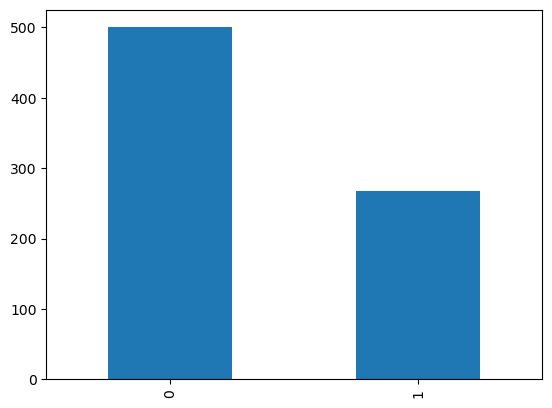

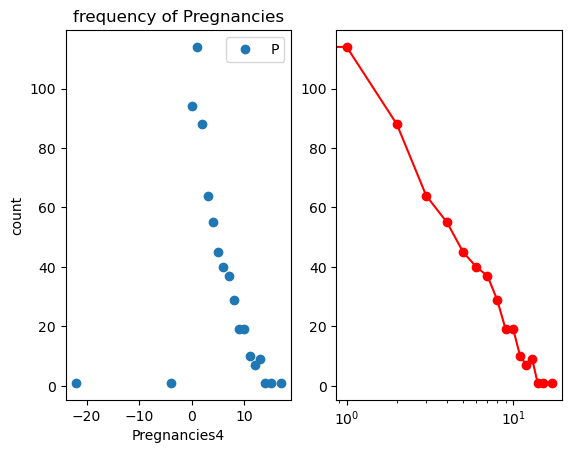

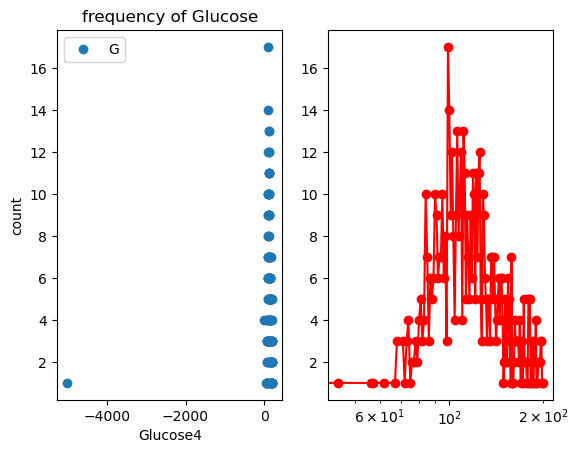

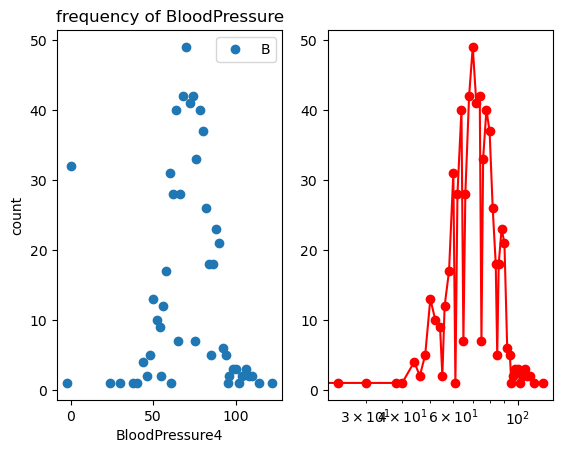

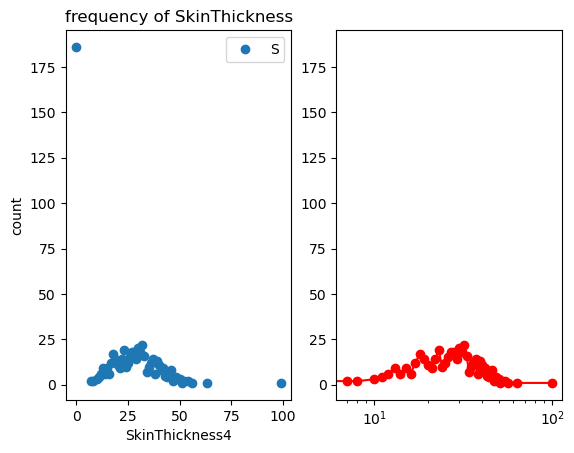

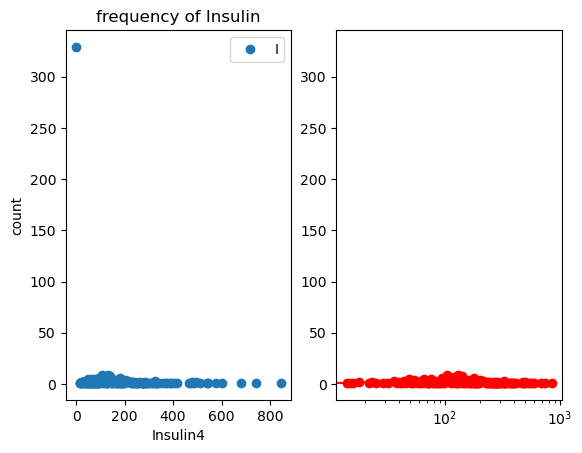

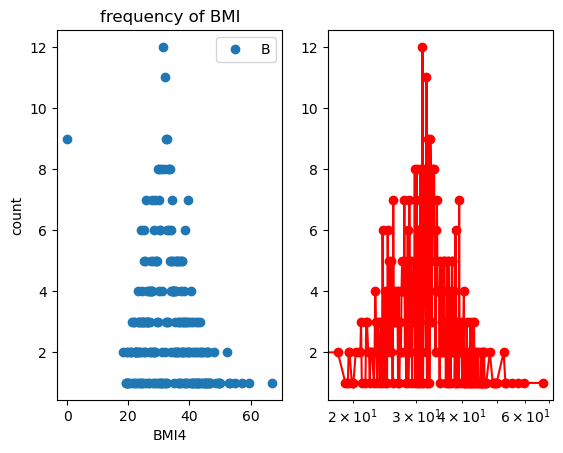

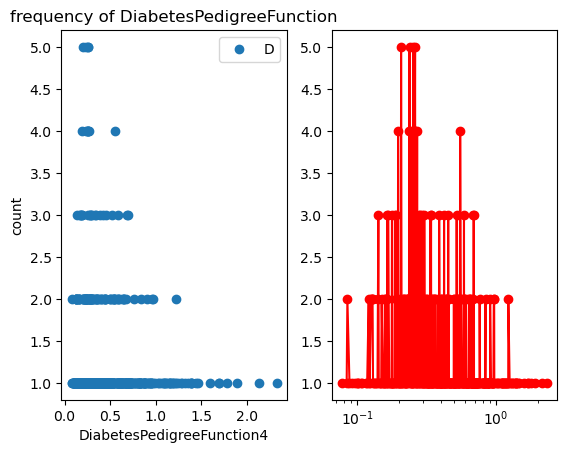

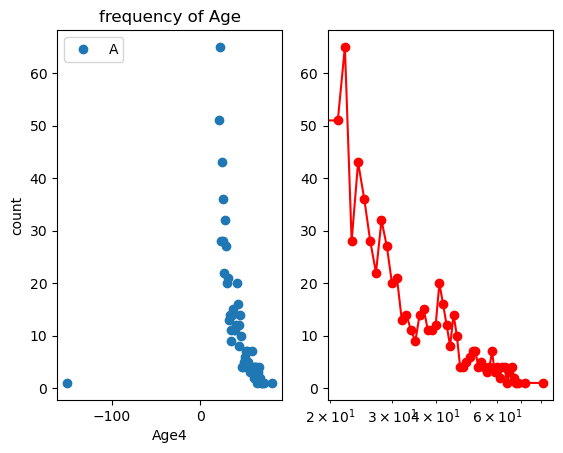

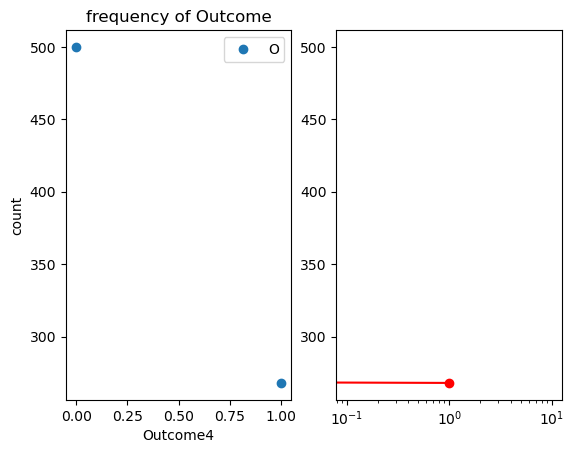

[(-22.0, 1), (-4.0, 1), (0.0, 94), (1.0, 114), (2.0, 88), (3.0, 64), (4.0, 55), (5.0, 45), (6.0, 40), (7.0, 37), (8.0, 29), (9.0, 19), (10.0, 19), (11.0, 10), (12.0, 7), (13.0, 9), (14.0, 1), (15.0, 1), (17.0, 1)]


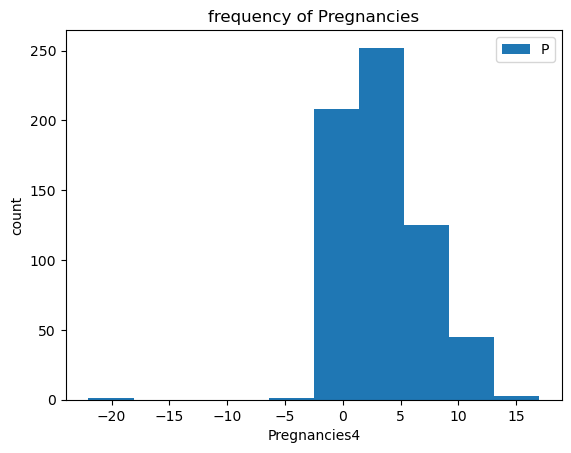

[(-5000.0, 1), (0.0, 4), (44.0, 1), (56.0, 1), (57.0, 1), (62.0, 1), (67.0, 1), (68.0, 3), (71.0, 3), (72.0, 1), (73.0, 3), (74.0, 4), (75.0, 1), (76.0, 2), (77.0, 2), (78.0, 3), (79.0, 2), (80.0, 4), (81.0, 5), (82.0, 3), (83.0, 4), (84.0, 10), (85.0, 7), (86.0, 3), (87.0, 6), (88.0, 5), (89.0, 6), (90.0, 10), (91.0, 9), (92.0, 6), (93.0, 7), (94.0, 7), (95.0, 10), (96.0, 6), (97.0, 8), (98.0, 3), (99.0, 17), (100.0, 14), (101.0, 9), (102.0, 12), (103.0, 8), (104.0, 4), (105.0, 9), (106.0, 13), (107.0, 8), (108.0, 10), (109.0, 12), (110.0, 4), (111.0, 13), (112.0, 11), (113.0, 5), (114.0, 9), (115.0, 7), (116.0, 5), (117.0, 9), (118.0, 6), (119.0, 11), (120.0, 10), (121.0, 5), (122.0, 11), (123.0, 7), (124.0, 11), (125.0, 12), (126.0, 5), (127.0, 3), (128.0, 10), (129.0, 9), (130.0, 6), (131.0, 5), (132.0, 3), (133.0, 5), (134.0, 5), (135.0, 3), (136.0, 7), (137.0, 7), (138.0, 5), (139.0, 7), (140.0, 5), (141.0, 3), (142.0, 4), (143.0, 5), (144.0, 6), (145.0, 4), (146.0, 6), (147.0, 6

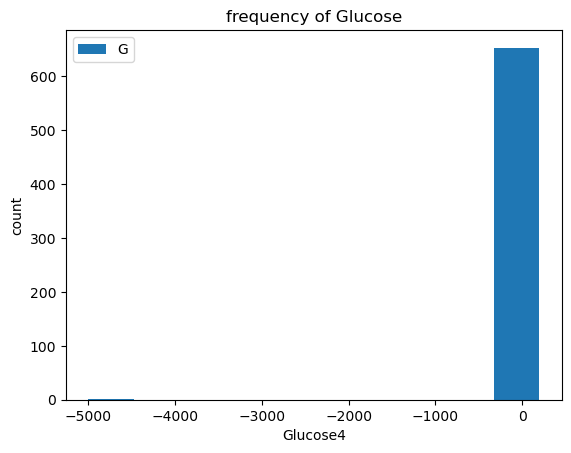

[(-2.0, 1), (0.0, 32), (24.0, 1), (30.0, 1), (38.0, 1), (40.0, 1), (44.0, 4), (46.0, 2), (48.0, 5), (50.0, 13), (52.0, 10), (54.0, 9), (55.0, 2), (56.0, 12), (58.0, 17), (60.0, 31), (61.0, 1), (62.0, 28), (64.0, 40), (65.0, 7), (66.0, 28), (68.0, 42), (70.0, 49), (72.0, 41), (74.0, 42), (75.0, 7), (76.0, 33), (78.0, 40), (80.0, 37), (82.0, 26), (84.0, 18), (85.0, 5), (86.0, 18), (88.0, 23), (90.0, 21), (92.0, 6), (94.0, 5), (95.0, 1), (96.0, 2), (98.0, 3), (100.0, 3), (102.0, 1), (104.0, 2), (106.0, 3), (108.0, 2), (110.0, 2), (114.0, 1), (122.0, 1)]


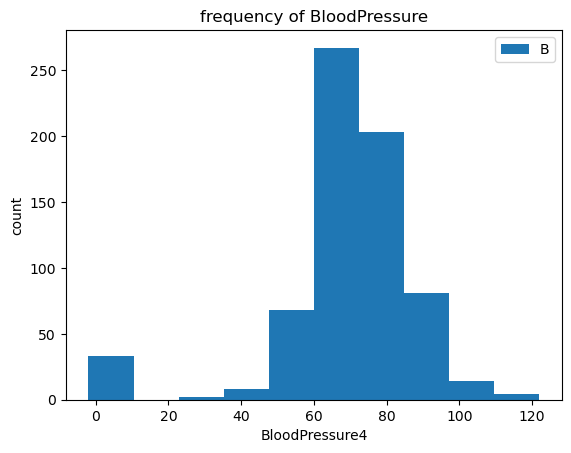

[(0.0, 186), (7.0, 2), (8.0, 2), (10.0, 3), (11.0, 4), (12.0, 6), (13.0, 9), (14.0, 6), (15.0, 9), (16.0, 6), (17.0, 12), (18.0, 17), (19.0, 14), (20.0, 11), (21.0, 9), (22.0, 14), (23.0, 19), (24.0, 10), (25.0, 12), (26.0, 15), (27.0, 18), (28.0, 18), (29.0, 14), (30.0, 20), (31.0, 18), (32.0, 22), (33.0, 16), (34.0, 7), (35.0, 10), (36.0, 12), (37.0, 14), (38.0, 6), (39.0, 13), (40.0, 11), (41.0, 8), (42.0, 9), (43.0, 5), (44.0, 4), (45.0, 5), (46.0, 8), (47.0, 2), (48.0, 4), (49.0, 3), (50.0, 3), (51.0, 1), (52.0, 2), (54.0, 2), (56.0, 1), (63.0, 1), (99.0, 1)]


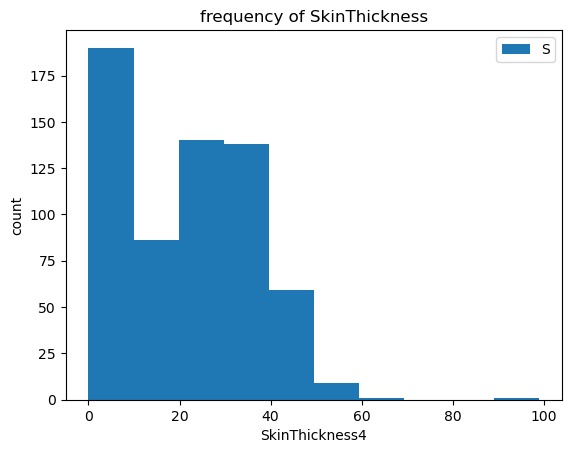

[(0.0, 329), (14.0, 1), (15.0, 1), (16.0, 1), (18.0, 2), (22.0, 1), (23.0, 2), (25.0, 1), (29.0, 1), (32.0, 1), (36.0, 3), (37.0, 2), (38.0, 1), (40.0, 2), (41.0, 1), (42.0, 1), (44.0, 3), (45.0, 2), (46.0, 1), (48.0, 3), (49.0, 5), (50.0, 3), (51.0, 1), (52.0, 1), (53.0, 2), (54.0, 4), (55.0, 1), (56.0, 3), (57.0, 2), (58.0, 2), (59.0, 1), (60.0, 2), (61.0, 1), (63.0, 2), (64.0, 4), (65.0, 1), (66.0, 5), (67.0, 2), (68.0, 1), (70.0, 3), (71.0, 1), (72.0, 1), (73.0, 1), (74.0, 3), (75.0, 3), (76.0, 5), (77.0, 2), (78.0, 1), (79.0, 2), (81.0, 1), (82.0, 3), (83.0, 2), (84.0, 1), (85.0, 2), (86.0, 1), (87.0, 2), (88.0, 3), (89.0, 1), (90.0, 3), (91.0, 1), (92.0, 3), (94.0, 6), (95.0, 1), (96.0, 2), (99.0, 1), (100.0, 6), (105.0, 9), (106.0, 3), (110.0, 6), (112.0, 1), (114.0, 2), (115.0, 5), (116.0, 2), (119.0, 1), (120.0, 7), (122.0, 2), (125.0, 3), (126.0, 3), (127.0, 1), (128.0, 1), (129.0, 1), (130.0, 9), (132.0, 2), (135.0, 6), (140.0, 8), (142.0, 1), (144.0, 2), (145.0, 3), (146.0,

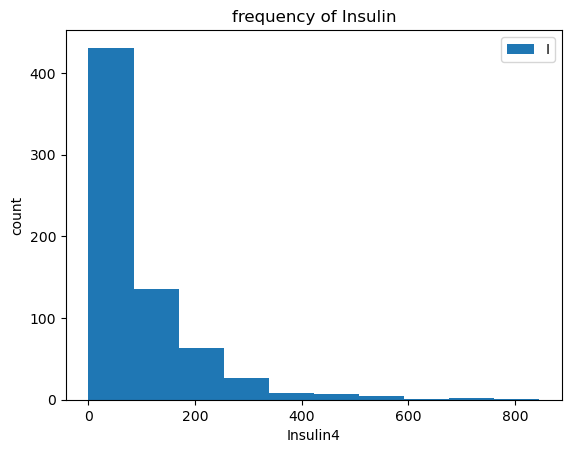

[(0.0, 9), (18.2, 2), (19.1, 1), (19.3, 1), (19.4, 1), (19.5, 2), (19.6, 2), (19.9, 1), (20.0, 1), (20.1, 1), (20.4, 2), (20.8, 2), (21.0, 2), (21.1, 3), (21.2, 1), (21.7, 1), (21.8, 3), (21.9, 3), (22.1, 2), (22.2, 2), (22.3, 1), (22.4, 2), (22.5, 2), (22.6, 2), (22.9, 1), (23.0, 2), (23.1, 4), (23.2, 3), (23.3, 2), (23.4, 1), (23.5, 3), (23.6, 3), (23.7, 2), (23.8, 1), (23.9, 2), (24.0, 3), (24.1, 1), (24.2, 6), (24.3, 3), (24.4, 3), (24.5, 1), (24.6, 4), (24.7, 3), (24.8, 2), (24.9, 1), (25.0, 6), (25.1, 3), (25.2, 5), (25.3, 2), (25.4, 3), (25.5, 2), (25.6, 5), (25.8, 1), (25.9, 7), (26.0, 3), (26.1, 3), (26.2, 4), (26.4, 3), (26.5, 3), (26.6, 4), (26.7, 1), (26.8, 4), (26.9, 1), (27.0, 2), (27.1, 3), (27.2, 2), (27.3, 4), (27.4, 5), (27.5, 4), (27.6, 4), (27.7, 4), (27.8, 7), (27.9, 2), (28.0, 5), (28.1, 1), (28.2, 2), (28.3, 2), (28.4, 6), (28.5, 1), (28.6, 2), (28.7, 7), (28.8, 2), (28.9, 5), (29.0, 5), (29.2, 1), (29.3, 3), (29.5, 5), (29.6, 3), (29.7, 8), (29.8, 1), (29.9, 4),

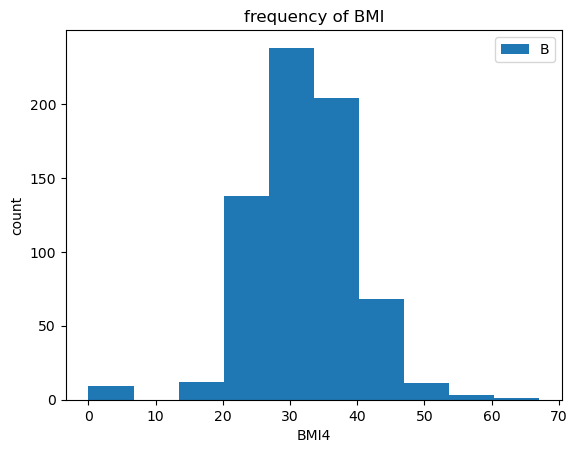

[(0.078, 1), (0.084, 1), (0.085, 2), (0.088, 1), (0.092, 1), (0.096, 1), (0.1, 1), (0.101, 1), (0.102, 1), (0.107, 1), (0.108, 1), (0.115, 1), (0.118, 1), (0.121, 2), (0.122, 1), (0.123, 1), (0.126, 2), (0.127, 2), (0.128, 2), (0.129, 2), (0.13, 1), (0.133, 1), (0.134, 1), (0.136, 1), (0.14, 1), (0.141, 2), (0.142, 3), (0.143, 1), (0.145, 1), (0.148, 1), (0.149, 1), (0.15, 2), (0.153, 1), (0.155, 1), (0.156, 1), (0.157, 1), (0.158, 2), (0.159, 2), (0.16, 1), (0.161, 2), (0.162, 1), (0.163, 1), (0.164, 2), (0.165, 3), (0.166, 1), (0.167, 3), (0.17, 1), (0.173, 1), (0.174, 1), (0.176, 1), (0.177, 1), (0.178, 3), (0.179, 1), (0.18, 1), (0.181, 1), (0.182, 1), (0.186, 1), (0.187, 3), (0.188, 1), (0.189, 2), (0.19, 3), (0.191, 1), (0.194, 1), (0.196, 1), (0.197, 4), (0.198, 2), (0.2, 1), (0.201, 1), (0.203, 1), (0.204, 1), (0.205, 2), (0.206, 1), (0.207, 5), (0.209, 1), (0.21, 1), (0.212, 2), (0.215, 1), (0.218, 2), (0.219, 2), (0.22, 1), (0.221, 1), (0.222, 1), (0.223, 2), (0.225, 1), (0.2

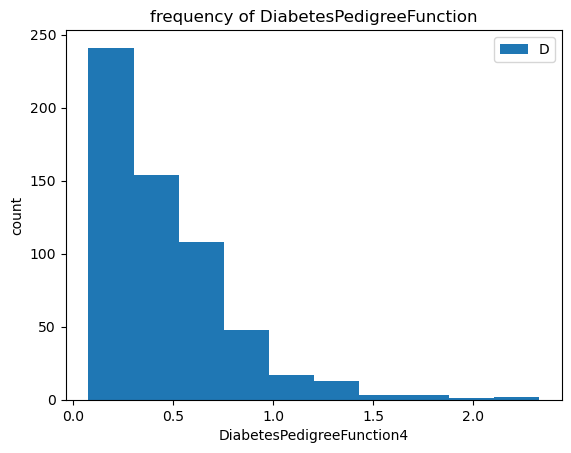

[(-150.0, 1), (21.0, 51), (22.0, 65), (23.0, 28), (24.0, 43), (25.0, 36), (26.0, 28), (27.0, 22), (28.0, 32), (29.0, 27), (30.0, 20), (31.0, 21), (32.0, 13), (33.0, 14), (34.0, 11), (35.0, 9), (36.0, 14), (37.0, 15), (38.0, 11), (39.0, 11), (40.0, 12), (41.0, 20), (42.0, 16), (43.0, 12), (44.0, 8), (45.0, 14), (46.0, 10), (47.0, 4), (48.0, 4), (49.0, 5), (50.0, 6), (51.0, 7), (52.0, 7), (53.0, 4), (54.0, 5), (55.0, 4), (56.0, 3), (57.0, 4), (58.0, 7), (59.0, 3), (60.0, 4), (61.0, 2), (62.0, 4), (63.0, 4), (64.0, 1), (65.0, 3), (66.0, 4), (67.0, 2), (68.0, 1), (69.0, 1), (72.0, 1), (81.0, 1)]


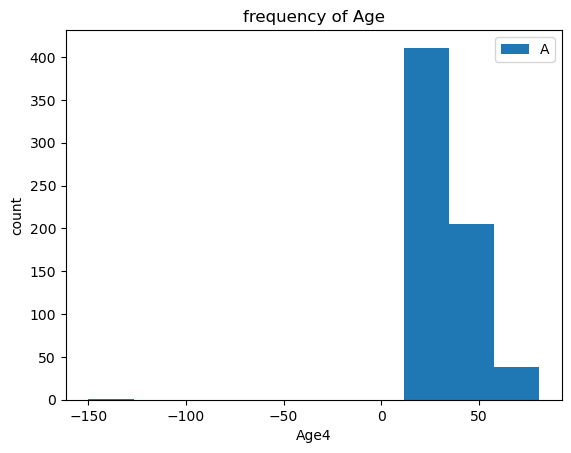

[(0, 500), (1, 268)]


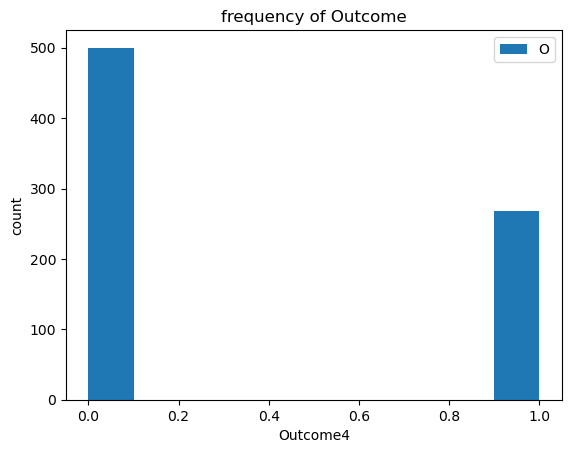

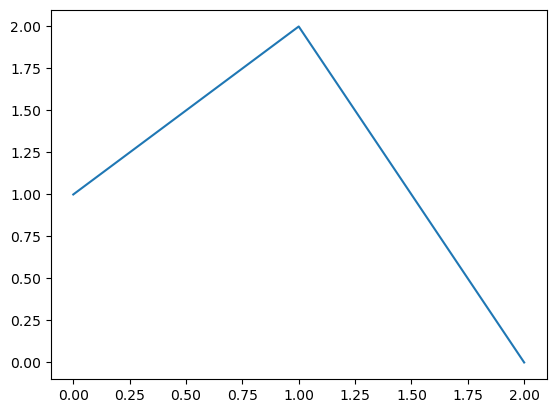

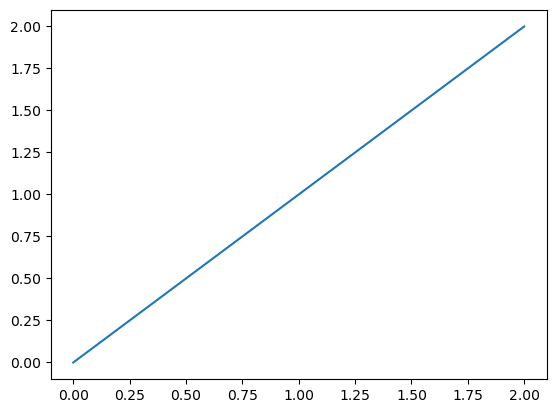

635


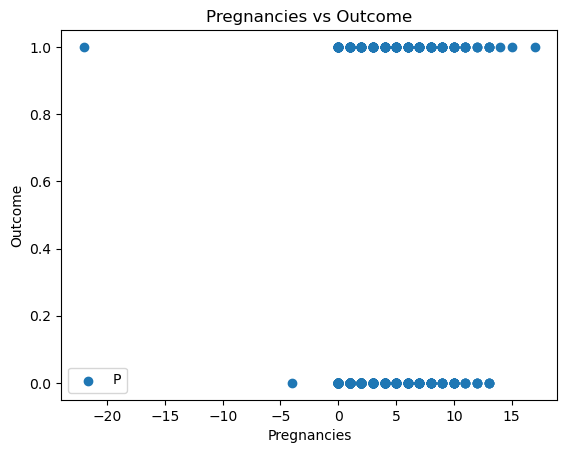

654


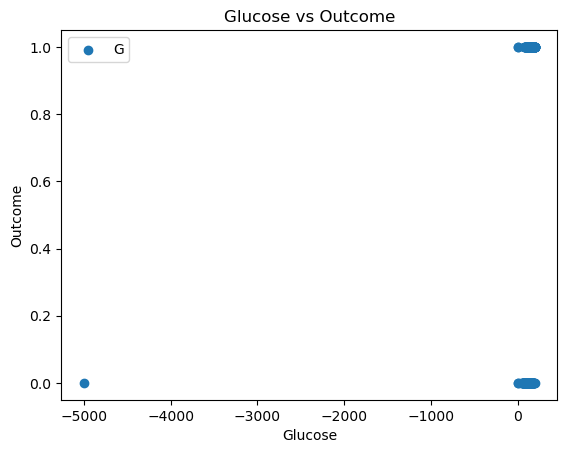

680


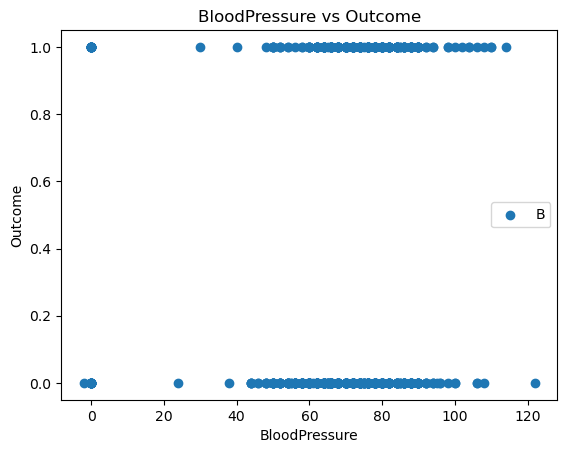

624


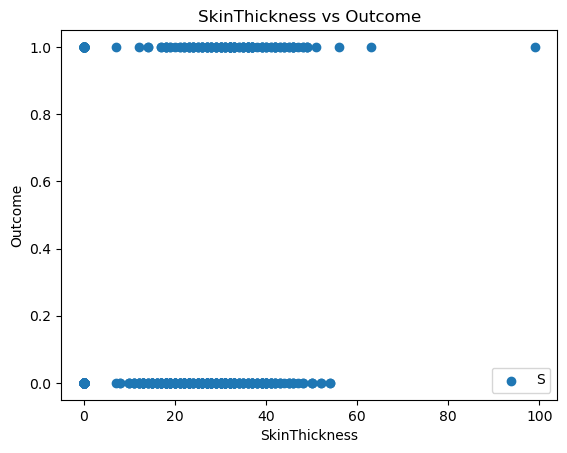

680


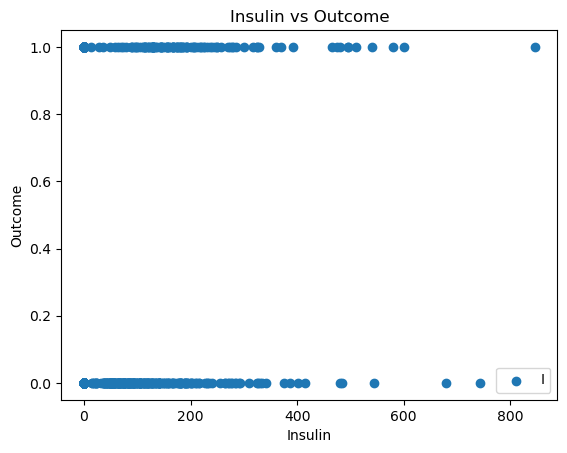

684


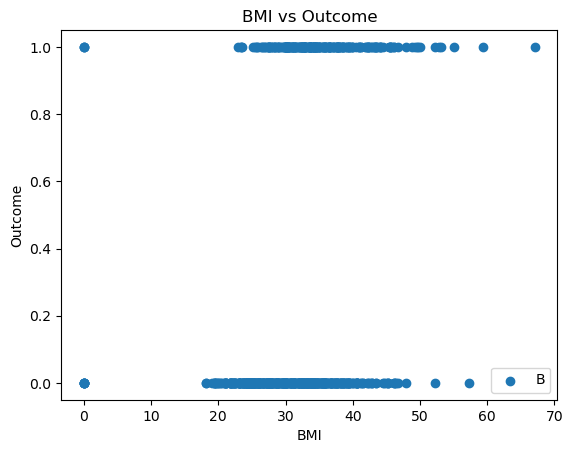

590


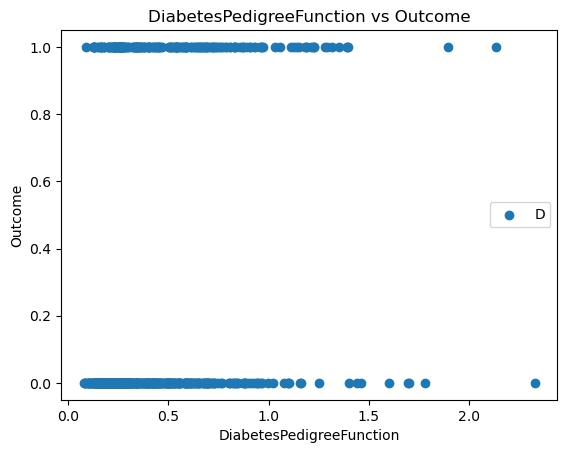

655


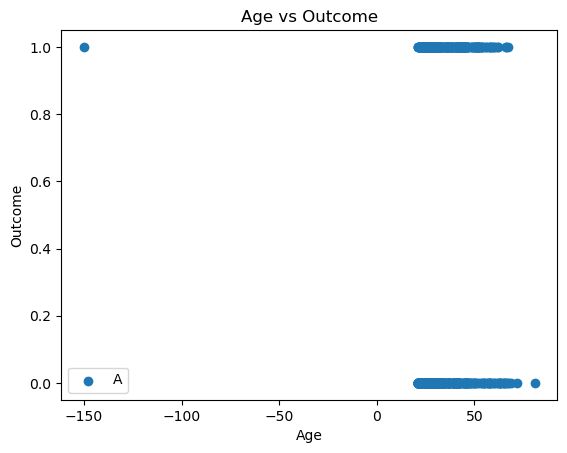

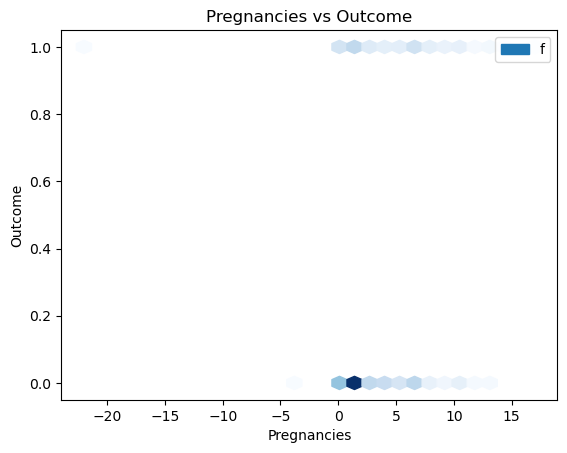

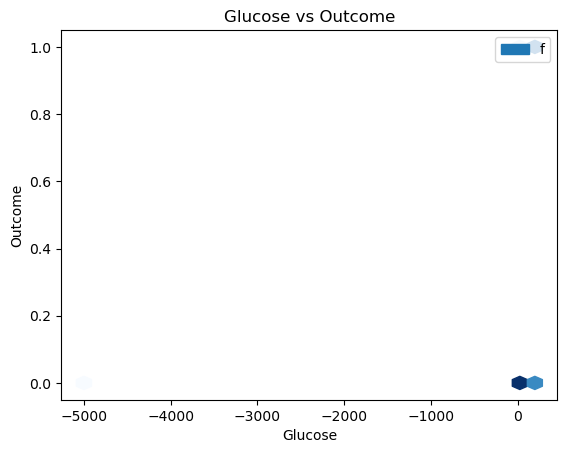

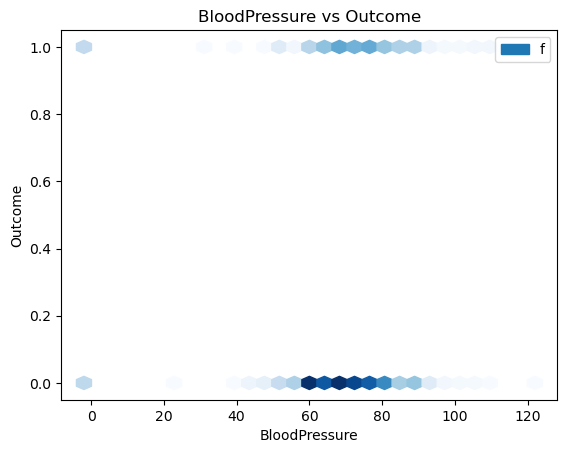

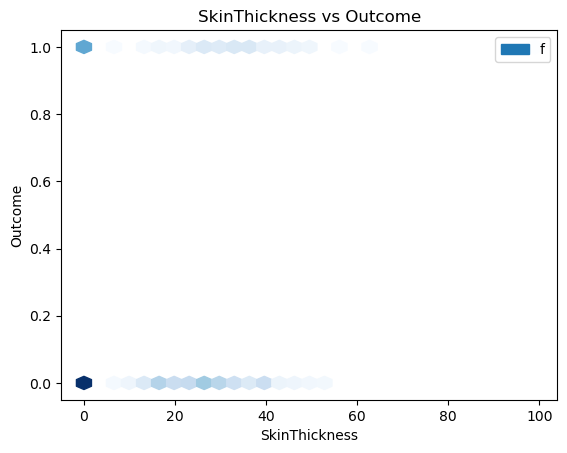

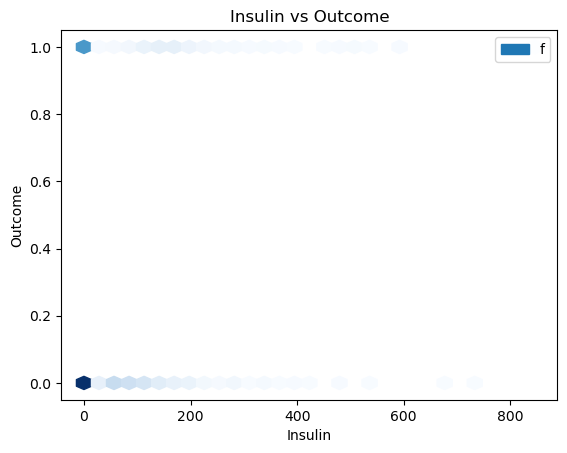

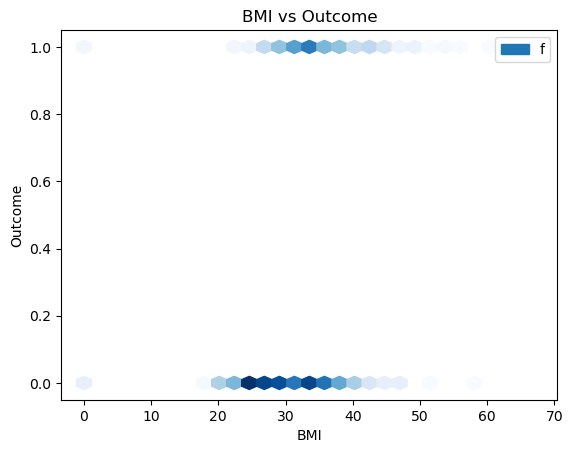

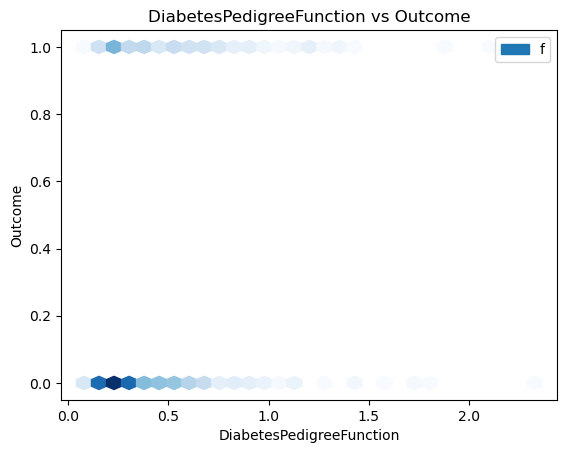

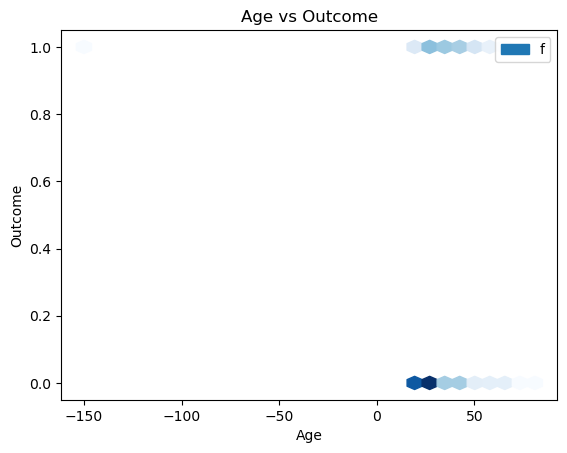

In [3]:
4,5,6
df.iloc[:,0].value_counts().plot(kind='bar')
df.apply(lambda col: col.value_counts().plot(kind='bar'))


# plot histogram
for col in list(df.columns):
  temp = df[col].value_counts()
  # size = temp.size

  sort_vals = list(sorted(list(zip( list(temp.index) , list(temp.values) ))))
  sort_vals = list(map(lambda x: x[1], sort_vals))
  # print(sort_vals)
  fig,ax = plt.subplots(1,2)
  ax[0].plot(sorted(temp.index), sort_vals,  'o')
  ax[0].set_xlabel(col+"4")
  ax[0].set_ylabel("count")
  ax[0].set_title(f'frequency of {col}')
  ax[0].legend(col)
  ax[1].set_xscale('log')
  ax[1].plot(sorted(temp.index), sort_vals,  'ro-')
  plt.show()

for col in list(df.columns):
  temp = df[col].value_counts()
  sort_vals = list(sorted(list(zip( list(temp.index) , list(temp.values) ))))
  print(sort_vals)
  sort_vals = list(map(lambda x: x[1], sort_vals))

  plt.hist(df[col])
  plt.xlabel(col+"4")
  plt.ylabel("count")
  plt.title(f'frequency of {col}')
  plt.legend(col)
  plt.show()
  

fig1, ax1 = plt.subplots(1)
ax1.plot([1,2,0])
fig2, ax2 = plt.subplots(1)
ax2.plot([0,1,2])
plt.show()

# scatter plot

for feature in features:
  joint = df[[feature, 'Outcome']]
  # print(joint)
  # print(( ~ joint['Outcome'].isna()))
  joint = joint[(~joint['Outcome'].isna()) & (~joint[feature].isna())]
  print(len(joint))
  plt.scatter(joint[feature], joint['Outcome'])
  plt.xlabel(feature)
  plt.ylabel('Outcome')
  plt.title(f'{feature} vs Outcome')
  plt.legend(feature)
  plt.show()

# hexbin plot
for feature in features:
  joint = df[[feature, 'Outcome']]
  # print(joint)
  # print(( ~ joint['Outcome'].isna()))
  joint = joint[(~joint['Outcome'].isna()) & (~joint[feature].isna())]
  # print(len(joint))
  plt.hexbin(joint[feature], joint['Outcome'], gridsize=30, cmap='Blues', mincnt=1)
  plt.xlabel(feature)
  plt.ylabel('Outcome')
  plt.title(f'{feature} vs Outcome')
  plt.legend('f')
  plt.show()


***Phaze2***

In [7]:
print(df.Pregnancies.mode()[0])
print(df.median())
dict(df.mean())

# print(list(df.dtypes))
# df
# for 
# for col in list(df.columns):
  

1.0
Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                23.000
Insulin                      34.000
BMI                          32.300
DiabetesPedigreeFunction      0.368
Age                          29.000
Outcome                       0.000
dtype: float64


{'Pregnancies': 3.7007874015748032,
 'Glucose': 113.42201834862385,
 'BloodPressure': 68.78676470588235,
 'SkinThickness': 20.38621794871795,
 'Insulin': 80.12352941176471,
 'BMI': 32.08362573099415,
 'DiabetesPedigreeFunction': 0.46667627118644067,
 'Age': 33.157251908396944,
 'Outcome': 0.3489583333333333}

In [8]:
# missing values

# msno.matrix(df)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.displot(df.Pregnancies)
def fill_miss_val(df, missing_flags={"drop": 0, "mean": 0, "median": 1, "mode": 0}):
  # print("before\n", df.count())
  new_df = df.copy()
  if(missing_flags["drop"] !=0):
      new_df.dropna(inplace=True)
  elif (missing_flags["mode"] !=0):
    for col in list(new_df.columns):
      new_df.fillna(new_df[col].mode()[0], inplace=True)
  else:
    # catergorical encoder
    # nominal one hot encode
    # from sklearn.preprocessing import OneHotEncoder
    # encoder = OneHotEncoder()
    # onehotarray = encoder.fit_transform(df[[column]]).toarray()
    # items = [f'{column}_{item}' for item in encoder.categories_[0]]
    # df[items] = onehotarray
    # orrrrrrrrrrrrr
    # df_cat = pd.get_dummies(df_cat, columns=['classlabel'], drop_first=True)
    #####################
    # ordinal encode
    # from sklearn.preprocessing import LabelEncoder
    # class_le = LabelEncoder()
    # df_cat['classlabel'] =
    # class_le.fit_transform(df_cat['classlabel'].values)

    if (missing_flags["mean"] !=0):
      for col in list(new_df.columns):
        new_df.fillna(new_df[col].mean(), inplace=True)
    elif (missing_flags["median"] !=0):
      for col in list(new_df.columns):
        new_df.fillna(new_df[col].median(), inplace=True)
  # print("after\n", df.count(), sep="")
  return new_df

df1 = fill_miss_val(df, missing_flags={"drop": 0, "mean": 0, "median": 1, "mode": 0})
print(df1)
df2 = fill_miss_val(df, missing_flags={"drop": 0, "mean": 0, "median": 0, "mode": 1})
df2.Pregnancies.value_counts()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            3.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            3.0    137.0           40.0           35.0    168.0   3.0   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0            3.0      0.0  36.8   
765          5.0      3.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            3.0      0.0  30.1   
767          3.0     93.0            3.0           31.0      3.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

 1.0     247
 0.0      94
 2.0      88
 3.0      64
 4.0      55
 5.0      45
 6.0      40
 7.0      37
 8.0      29
 10.0     19
 9.0      19
 11.0     10
 13.0      9
 12.0      7
 15.0      1
-4.0       1
-22.0      1
 17.0      1
 14.0      1
Name: Pregnancies, dtype: int64

In [9]:
# train & test split
def cal_train_test(df, test_size, rnd_state, scale_flags = {"normalize": 0, "standardize": 1}, flag_before_split=True):
  # rnd_state = 25 #None
  # test_size = 0.5
  # normalize & standardize
  st_x = StandardScaler()
  norm_x = MinMaxScaler()
  X = df.drop('Outcome', axis=1)
  Y = df['Outcome']
  if flag_before_split:
    if scale_flags["normalize"] != 0:
      X = norm_x.fit_transform(X)
    elif scale_flags["standardize"] != 0:
      X = st_x.fit_transform(X)
  # print("after\n", df, sep="")
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=rnd_state)

  # training_data, testing_data = train_test_split(df, test_size=test_size, random_state=rnd_state)
  # print(f"No. of training examples: {training_data.shape[0]}")
  # print(f"No. of testing examples: {testing_data.shape[0]}")


  # print("before\n train\n", x_train.mean(), "\n test\n", x_test.mean(), sep="")
  if flag_before_split == False:
    if scale_flags["normalize"] != 0:
        x_train = norm_x.fit_transform(x_train)
        x_test = norm_x.transform(x_test)
    elif scale_flags["standardize"] != 0:
        x_train = st_x.fit_transform(x_train)
        x_test = st_x.transform(x_test)

  return [x_train, x_test, y_train, y_test]
  # print("after\n train\n", x_train.mean(), "\n test\n", x_test.mean(), sep="")
cal_train_test(df1, test_size=0.5, rnd_state=25, scale_flags = {"normalize": 0, "standardize": 1}, flag_before_split=True)

[array([[-4.92419113e-01,  3.03354064e-01,  4.55675606e-01, ...,
         -1.97075027e-01,  1.76024025e+00, -1.03348202e-01],
        [-8.04189829e-01, -1.36223146e-01,  5.98618061e-01, ...,
          3.67805033e-01, -5.71463535e-01, -4.63854270e-01],
        [-1.80648397e-01, -4.92071364e-01, -2.18875981e+00, ...,
         -4.45279903e-01, -7.81298786e-01, -4.32638576e-02],
        ...,
        [ 1.31122319e-01,  8.87985213e-02,  9.83194686e-02, ...,
         -2.22885125e-04, -8.39184372e-01, -2.83601236e-01],
        [-1.80648397e-01, -4.92071364e-01,  1.69790696e-01, ...,
          7.87185684e-01, -8.17477277e-01, -4.32638576e-02],
        [-1.80648397e-01,  3.81849995e-01,  9.83194686e-02, ...,
          4.79069287e-01, -6.31158046e-01,  7.69048318e-02]]),
 array([[ 1.6899759 ,  0.19345976,  0.45567561, ..., -0.25698655,
          1.76024025,  3.14120641],
        [ 0.13112232,  0.07309934,  0.38420438, ...,  0.7015978 ,
          0.30405596,  1.63909779],
        [ 1.37820518, -0.

***Phaze3***

{'drop': 1, 'mean': 0, 'median': 0, 'mode': 0}
198
test_size: 0.1
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7536507936507937
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.7585687382297551
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.60
decision tree
best_score on self:  0.7980952380952381
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
Accuracy Score: 0.60
random forest
best_score on self:  0.7923728813559322
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Accuracy Score: 0.70
{'normalize': 1, 'standardize': 0}
Logistic Regression
best_score on self:  0.7587301587301588
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score o

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_score on self:  0.8333333333333333
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.813157894736842
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.73
test_size: 0.8
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.9
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.8717948717948718
{'weights': 'uniform', 'p': 3, 'n_neighbors': 3, 'leaf_size': 11, 'algorithm': 'auto'}
Accuracy Score: 0.70
decision tree
best_score on self:  0.875
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 8}
Accuracy Score: 0.67
random forest
best_score on self:  0.8974358974358975
{'n_estimators': 71, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Accuracy Score: 0.72
{'nor

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.73015873 0.73809524        nan 0.73809524 0.73809524 0.73809524
        nan 0.73809524 0.73015873 0.73809524        nan 0.73809524
        nan 0.79365079 0.73015873        nan 0.73809524 0.73809524
        nan        nan        nan 0.73809524        nan        nan
        nan 0.73015873 0.73809524 0.57142857 0.73809524 0.73809524
        nan        nan        nan 0.68253968 0.79365079 0.68253968
 0.73809524 0.73809524        nan 0.73809524 0.73809524        nan
 0.73809524 0.73809524 0.73809524 0.73015873        nan 0.68253968
        nan 0.68253968 0.68253968 0.73015873 0.73015873        nan
        nan 0.73809524        nan 0.73809524 0.73809524 0.68253968
 0.73809524        nan 0.68253968 0.79365079        nan 0.73809524
 0.68253968 0.73809524 0.73015873 0.73809524 0.73809524        nan
 0.73809524 0.73809524 0.73809524        nan 0.73809524  

best_score on self:  0.7936507936507936
{'weights': 'distance', 'p': 4, 'n_neighbors': 3, 'leaf_size': 51, 'algorithm': 'brute'}
Accuracy Score: 0.69
decision tree
best_score on self:  0.8
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 8}
Accuracy Score: 0.75
random forest
best_score on self:  0.7936507936507936
{'n_estimators': 97, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Accuracy Score: 0.72
{'normalize': 1, 'standardize': 0}
Logistic Regression
best_score on self:  0.9
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.68253968 0.73809524        nan 0.68253968 0.73809524 0.73809524
        nan 0.73809524 0.68253968 0.73809524        nan 0.73809524
        nan 0.73809524 0.68253968        nan 0.73809524 0.73809524
        nan        nan        nan 0.73809524        nan        nan
        nan 0.68253968 0.73809524 0.62698413 0.73809524 0.73809524
        nan        nan        nan 0.68253968 0.68253968 0.68253968
 0.73809524 0.73809524        nan 0.73809524 0.73809524        nan
 0.73809524 0.73809524 0.73809524 0.68253968        nan 0.68253968
        nan 0.62698413 0.68253968 0.68253968 0.68253968        nan
        nan 0.68253968        nan 0.73809524 0.73809524 0.68253968
 0.73809524        nan 0.68253968 0.73809524        nan 0.68253968
 0.68253968 0.73809524 0.68253968 0.73809524 0.73809524        nan
 0.73809524 0.73809524 0.73809524        nan 0.73809524  

best_score on self:  0.7380952380952381
{'weights': 'uniform', 'p': 3, 'n_neighbors': 3, 'leaf_size': 11, 'algorithm': 'auto'}
Accuracy Score: 0.69
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.95
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.72
k-Nearest Neighbors


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.62698413 0.62698413        nan 0.73809524 0.62698413 0.73809524
        nan 0.73809524 0.68253968 0.73809524        nan 0.73809524
        nan 0.62698413 0.68253968        nan 0.73809524 0.73809524
        nan        nan        nan 0.73809524        nan        nan
        nan 0.62698413 0.73809524 0.68253968 0.73809524 0.73809524
        nan        nan        nan 0.68253968 0.62698413 0.73809524
 0.73809524 0.73809524        nan 0.73809524 0.73809524        nan
 0.73809524 0.73809524 0.73809524 0.68253968        nan 0.62698413
        nan 0.73809524 0.68253968 0.62698413 0.62698413        nan
        nan 0.73809524        nan 0.73809524 0.73809524 0.73809524
 0.73809524        nan 0.62698413 0.62698413        nan 0.73809524
 0.68253968 0.73809524 0.68253968 0.73809524 0.73809524        nan
 0.62698413 0.73809524 0.73809524        nan 0.73809524  

best_score on self:  0.7380952380952381
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.68
{'drop': 0, 'mean': 1, 'median': 0, 'mode': 0}
768
test_size: 0.1
{'normalize': 0, 'standardize': 1}
Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


best_score on self:  0.712032113439683
{'C': 1, 'penalty': 'l2', 'solver': 'sag', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6815923207227556
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 51, 'algorithm': 'brute'}
Accuracy Score: 0.70
decision tree
best_score on self:  0.7511208424564696
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}
Accuracy Score: 0.68
random forest
best_score on self:  0.7496267018006147
{'n_estimators': 185, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Accuracy Score: 0.78
{'normalize': 1, 'standardize': 0}
Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7105515587529976
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6671685802120585
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.69
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7279324366593682
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.7322353974527888
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.75
test_size: 0.2
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7067972810875649
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.72
k-Nearest Neighbors
best_score on self:  0.6823688825123545
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 51, 'algorithm': '

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7051712648274023
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.70
k-Nearest Neighbors
best_score on self:  0.675872788139646
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'}
Accuracy Score: 0.62
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7165800346528055
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.72
k-Nearest Neighbors
best_score on self:  0.7312290769966524
{'weights': 'uniform', 'p': 1, 'n_neighbors': 7, 'leaf_size': 51, 'algorithm': 'auto'}
Accuracy Score: 0.71
test_size: 0.3
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6925406715126341
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6945996275605214
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'}

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6925406715126341
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.6759776536312848
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'auto'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7130841121495327
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.7355679702048418
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'auto'}
Accuracy Score: 0.71
test_size: 0.4
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6543021248903602
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'}
Accuracy Sco

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.70
k-Nearest Neighbors
best_score on self:  0.6456299691593809
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7239130434782609
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.7282064340887869
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.69
test_size: 0.5
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7135680109364321
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6510416666666666
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accur

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7135338345864662
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.70
k-Nearest Neighbors
best_score on self:  0.6276041666666666
{'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'leaf_size': 51, 'algorithm': 'brute'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7161995898838005
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6822916666666666
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.73
test_size: 0.6
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.693918561607615
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.76
k-Nearest Neighbors
best_score on self:  0.6775493368868583
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6906927551560021
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6514690018402183
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.62
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.697144368059228
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6939209340694207
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.73
test_size: 0.7
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6695652173913043
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6870585554796081
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'bru

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


best_score on self:  0.6695652173913045
{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6523125996810207
{'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'leaf_size': 51, 'algorithm': 'auto'}
Accuracy Score: 0.62
{'normalize': 0, 'standardize': 0}
Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6695652173913043
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6782866256550467
{'weights': 'uniform', 'p': 3, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'auto'}
Accuracy Score: 0.71
test_size: 0.8
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6929032258064516
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6928104575163397
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.63
decision tree
best_score on self:  0.7451612903225806
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8}
Accuracy Score: 0.67
random forest
best_score on self:  0.7712418300653594
{'n_estimators': 36, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootst

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6733333333333333
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.65
k-Nearest Neighbors
best_score on self:  0.6993464052287582
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.62
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7193548387096774
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.7254901960784313
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.69
test_size: 0.9
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7108333333333333
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.66
k-Nearest Neighbors
best_score on self:  0.7225641025641026
{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'leaf_size': 31, 'algorithm': 'ball_tr

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6983333333333334
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.65
k-Nearest Neighbors
best_score on self:  0.657948717948718
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.68
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7116666666666667
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.7230769230769232
{'weights': 'distance', 'p': 2, 'n_neighbors': 13, 'leaf_size': 51, 'algorithm': 'auto'}
Accuracy Score: 0.71
{'drop': 0, 'mean': 0, 'median': 1, 'mode': 0}
768
test_size: 0.1
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7149098112814097
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6743459439111613
{'weights': 'distance', 'p': 1, 'n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7051712648274023
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.69
k-Nearest Neighbors
best_score on self:  0.6791327913279132
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'}
Accuracy Score: 0.62
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7149540183926429
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.72
k-Nearest Neighbors
best_score on self:  0.7279929858122111
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.71
test_size: 0.3
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6944098303911388
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6871508379888268
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'a

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6944098303911388
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.6778398510242085
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'auto'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7112322602976808
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.7355679702048418
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'auto'}
Accuracy Score: 0.71
test_size: 0.4
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7021739130434783
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.656551509492686
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 51, 'algorithm': 'brute'

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.69
k-Nearest Neighbors
best_score on self:  0.6522083580907111
{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'leaf_size': 31, 'algorithm': 'ball_tree'}
Accuracy Score: 0.65
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7239130434782609
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.7303709362532892
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.70
test_size: 0.5
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7136021872863979
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6536458333333334
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 51, 'algorithm': 'brute'}
Accu

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7109364319890636
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.69
k-Nearest Neighbors
best_score on self:  0.6328125
{'weights': 'distance', 'p': 2, 'n_neighbors': 15, 'leaf_size': 51, 'algorithm': 'brute'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7161995898838005
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6744791666666666
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.73
test_size: 0.6
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.697144368059228
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6840852845992766
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd_tree'}

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.697144368059228
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6581953169617362
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.697144368059228
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.700456881781839
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.73
test_size: 0.7
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6652173913043479
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6784005468215994
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brut

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6652173913043479
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6610845295055822
{'weights': 'uniform', 'p': 4, 'n_neighbors': 15, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.64
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.6695652173913044
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6782866256550467
{'weights': 'uniform', 'p': 4, 'n_neighbors': 15, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.71
test_size: 0.8
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6929032258064516
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.6993464052287582
{'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'leaf_size': 51, 'algorithm': 'brute

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6733333333333333
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.65
k-Nearest Neighbors
best_score on self:  0.6993464052287582
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.61
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.706021505376344
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.7254901960784313
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.69
test_size: 0.9
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7108333333333333
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.66
k-Nearest Neighbors
best_score on self:  0.7087179487179487
{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'leaf_size': 31, 'algorithm': 'ball

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6983333333333334
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.65
k-Nearest Neighbors
best_score on self:  0.6574358974358975
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.67
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.725
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.735897435897436
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.72
{'drop': 0, 'mean': 0, 'median': 0, 'mode': 1}
768
test_size: 0.1
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.727911583776457
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.6917497960976221
{'weights': 'distance', 'p': 1, 'n_neighbors': 1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7264623084141382
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6700545830980614
{'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'auto'}
Accuracy Score: 0.68
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.727911583776457
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.7322479452914236
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.74
test_size: 0.2
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7198187391709983
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.70
k-Nearest Neighbors
best_score on self:  0.6970907062011796
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm': 'auto'

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7198187391709983
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.66
k-Nearest Neighbors
best_score on self:  0.6709947393591583
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7263361322137811
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.69
k-Nearest Neighbors
best_score on self:  0.7312450183325363
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.71
test_size: 0.3
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7055728625822084
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6834264432029795
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm':

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6978260869565217
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.69
k-Nearest Neighbors
best_score on self:  0.6674306086070793
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7217391304347827
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.7346999405822935
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.71
test_size: 0.5
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7188311688311688
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6666666666666666
{'weights': 'distance', 'p': 1, 'n_neighbors': 13, 'leaf_size': 1, 'algorithm'

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7188311688311688
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.67
k-Nearest Neighbors
best_score on self:  0.6536458333333334
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7240601503759397
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.671875
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.73
test_size: 0.6
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6907456372289794
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.76
k-Nearest Neighbors
best_score on self:  0.6711403007805065
{'weights': 'uniform', 'p': 2, 'n_neighbors': 9, 'leaf_size': 51, 'algorithm': 'auto'}
Accuracy Scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6907456372289794
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.67
k-Nearest Neighbors
best_score on self:  0.6679040548258138
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_score on self:  0.6972501322051825
{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs', 'max_iter': 400}
Accuracy Score: 0.75
k-Nearest Neighbors
best_score on self:  0.7069928294942572
{'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 41, 'algorithm': 'kd_tree'}
Accuracy Score: 0.73
test_size: 0.7
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6608695652173913
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.73
k-Nearest Neighbors
best_score on self:  0.6915014809751652
{'weights': 'distance', 'p': 1, 'n_neighbors': 7, 'leaf_size': 21, 'algorithm': 'brute'}
Accuracy Score: 0.66
decision tree
best_score on self:  0.7
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 10}
Accuracy Score: 0.70
random forest
best_score on self:  0.7526201868307131
{'n_estimators': 132, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Ac

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.6608695652173913
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.66
k-Nearest Neighbors
best_score on self:  0.673900660742766
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.65
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.6652173913043479
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.74
k-Nearest Neighbors
best_score on self:  0.6782866256550467
{'weights': 'uniform', 'p': 4, 'n_neighbors': 15, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.71
test_size: 0.8
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.7129032258064516
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.68
k-Nearest Neighbors
best_score on self:  0.7124183006535948
{'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'leaf_size': 51, 'algorithm': 'br

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


best_score on self:  0.7064516129032258
{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg', 'max_iter': 400}
Accuracy Score: 0.67
k-Nearest Neighbors
best_score on self:  0.7058823529411765
{'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy Score: 0.63
{'normalize': 0, 'standardize': 0}
Logistic Regression
best_score on self:  0.7195698924731182
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.71
k-Nearest Neighbors
best_score on self:  0.7320261437908497
{'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 21, 'algorithm': 'auto'}
Accuracy Score: 0.69
test_size: 0.9
{'normalize': 0, 'standardize': 1}
Logistic Regression
best_score on self:  0.6983333333333334
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 400}
Accuracy Score: 0.67
k-Nearest Neighbors
best_score on self:  0.735897435897436
{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 41, 'algorithm': 'kd_tr

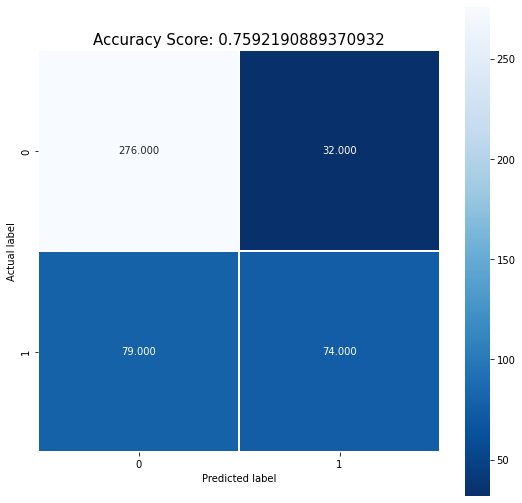

tn: 276 
fp:  32 
fn: 79 
tp: 74
[[48  8]
 [11 10]]
0    455
1    237
Name: Outcome, dtype: int64


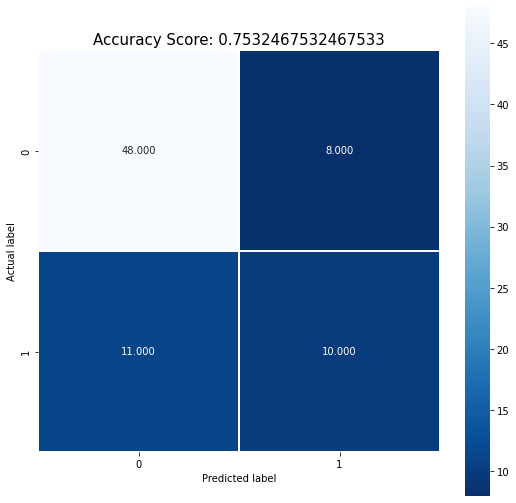

tn: 48 
fp:  8 
fn: 11 
tp: 10
[[35  6]
 [ 8 11]]
0    455
1    237
Name: Outcome, dtype: int64


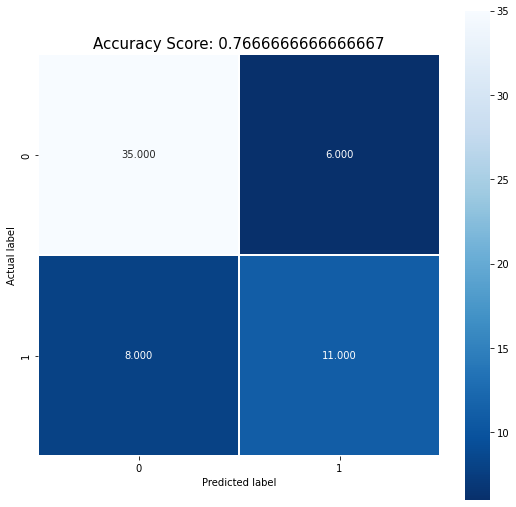

tn: 35 
fp:  6 
fn: 8 
tp: 11
[[52  4]
 [13  8]]
0    455
1    237
Name: Outcome, dtype: int64


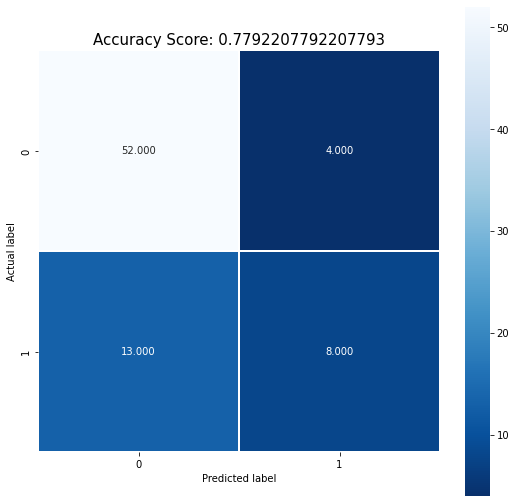

tn: 52 
fp:  4 
fn: 13 
tp: 8


In [10]:
# train model using: 
# Logistic Regression
# k-Nearest Neighbors
# decision tree
# random forest
############################################
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def train_model(model, x_train, y_train, x_test, y_test, param_grid,
 model_param, result, flag_rnd_Search=False, flag_tune=True ):
    if flag_tune:
      #tunning:
      if flag_rnd_Search:
        rsc = RandomizedSearchCV(estimator= model, param_distributions=param_grid,
          scoring='accuracy', cv=3, n_jobs=-1, verbose=0,n_iter=80,random_state=42)
        rnd_result = rsc.fit(x_train, y_train)
        print("best_score on self: ", rnd_result.best_score_)
        if result["train_score"] < rnd_result.best_score_:
          result["train_score"] = rnd_result.best_score_
          result["train_params"] = rnd_result.best_params_
        best_params = rnd_result.best_params_
        best_params.update(model_param)
        print(best_params)             
        model = model.set_params(**model_param)
        # model = rnd_result.best_estimator_
      else:  
        gsc = GridSearchCV(estimator= model, param_grid=param_grid,
        scoring='accuracy', cv=5, n_jobs=-1, verbose=0)
        grid_result = gsc.fit(x_train, y_train)
        print("best_score on self: ", grid_result.best_score_)
        if result["train_score"] < grid_result.best_score_:
          result["train_score"] = grid_result.best_score_
          result["train_params"] = grid_result.best_params_
        best_params = grid_result.best_params_
        best_params.update(model_param)
        print(best_params)             
        model = model.set_params(**model_param)
      
        # model = grid_result.best_estimator_
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = model.score(x_test, y_test)
    # result.append(score)
    if result["test_score"] < score:
      result["test_score"] = score
      result["cm"] = metrics.confusion_matrix(y_test, predictions)

    print('Accuracy Score: {0:.2f}'.format(score))
    # cm = metrics.confusion_matrix(y_test, predictions)
    # print(cm)
    # print(y_test.value_counts())
    # plt.figure(figsize=(9,9))
    # sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    # plt.ylabel('Actual label')
    # plt.xlabel('Predicted label')
    # all_sample_title = 'Accuracy Score: {0}'.format(score)
    # plt.title(all_sample_title, size = 15)
    # plt.show()
    # tn, fp, fn, tp = cm.ravel()
    # print("tn:", tn,"\nfp: ", fp, "\nfn:",fn, "\ntp:",tp)


result_logic = {"train_params": "", "train_score": 0.0, "cm": "", "test_score": 0.0}
result_knn = {"train_params": "", "train_score": 0.0, "cm": "", "test_score": 0.0}
result_tree = {"train_params": "", "train_score": 0.0, "cm": "", "test_score": 0.0}
result_rf = {"train_params": "", "train_score": 0.0, "cm": "", "test_score": 0.0}

for miss_flags in [{"drop": 1, "mean": 0, "median": 0, "mode": 0}, 
    {"drop": 0, "mean": 1, "median": 0, "mode": 0},
     {"drop": 0, "mean": 0, "median": 1, "mode": 0},
      {"drop": 0, "mean": 0, "median": 0, "mode": 1}]:
  print(miss_flags)
  new_df = fill_miss_val(df, miss_flags)
  print(len(new_df))
  for i in range(1, 10):
    print("test_size: 0.", i, sep="")
    for scale_flags in [{"normalize": 0, "standardize": 1},
                        {"normalize": 1, "standardize": 0},
                        {"normalize": 0, "standardize": 0}]:
      print(scale_flags)
      [x_train, x_test, y_train, y_test] = cal_train_test(new_df, i*0.1, 15, scale_flags)
      print("Logistic Regression")
      param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 
                    'solver': ['liblinear']},
                    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2', 'none'], 
                    'solver': ['newton-cg', 'lbfgs', 'sag']},
                    # {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['elasticnet', 'l1', 'l2', 'none'], 
                    # 'solver': ['saga']}
                    ]
      # param_grid = {'C': np.logspace(-4, 4, 20), 'penalty': ['l2']}
      model_param = {"max_iter": 400}
      train_model(LogisticRegression(), x_train, y_train, x_test, y_test, param_grid,
                  model_param,result_logic)
      # train_model(LogisticRegression(max_iter=400), x_train, y_train, x_test, y_test, param_grid,model_param,False)
      model_param = {}
      leaf_size = list(range(1,55, 10))
      n_neighbors = list(range(1,17,2))
      p=[1,2,3,4]
      #Convert to dictionary
      param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, 
        weights=['uniform', 'distance'], algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])
      print("k-Nearest Neighbors")
      train_model(KNeighborsClassifier(), x_train, y_train, x_test, y_test, param_grid,
                  model_param,result_knn, True)
      if scale_flags["standardize"] == 1:
        model_param = {}
        param_grid = {
        'max_depth': [2, 3, 5, 10, 20, 30],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'min_samples_split':[8,10,12,18,20,16],
        'criterion': ["gini", "entropy"]
        }
        print("decision tree")
        train_model(DecisionTreeClassifier(), x_train, y_train, x_test, y_test, param_grid,
                    model_param,result_tree)
        model_param = {}
        # Number of trees in random forest

        # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        n_estimators = [int(x) for x in np.linspace(start = 10, stop = 220, num = 25)]

        # Number of features to consider at every split
        max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree

        # max_depth = [int(x) for x in np.linspace(10, 70, num = 20)]
        max_depth = [10, 20]

        max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4]
        # Method of selecting samples for training each tree
        bootstrap = [True, False]
        # Create the random grid
        param_grid = {'n_estimators': n_estimators,
                      'max_features': max_features,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap}
        print("random forest")
        train_model(RandomForestClassifier(), x_train, y_train, x_test, y_test,
                    param_grid,model_param,result_rf, True)


print("\n log result : ", result_logic)
print("\n knn result : ", result_knn)
print("\n tree result : ", result_tree)
print("\n rf result : ", result_rf)

def print_result(res, x_test, y_test):
  # predictions = model.predict(x_test)
  # score = model.score(x_test, y_test)
  # cm = metrics.confusion_matrix(y_test, predictions)
  cm = res["cm"]
  print(cm)
  print(y_test.value_counts())
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  all_sample_title = 'Accuracy Score: {0}'.format(res["test_score"])
  plt.title(all_sample_title, size = 15)
  plt.show()
  tn, fp, fn, tp = cm.ravel()
  print("tn:", tn,"\nfp: ", fp, "\nfn:",fn, "\ntp:",tp)


print_result(result_logic, x_test, y_test)
print_result(result_knn, x_test, y_test)
print_result(result_tree, x_test, y_test)
print_result(result_rf, x_test, y_test)



# plt.plot(result)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[[  3 452]
 [  0 237]]
0    455
1    237
Name: Outcome, dtype: int64


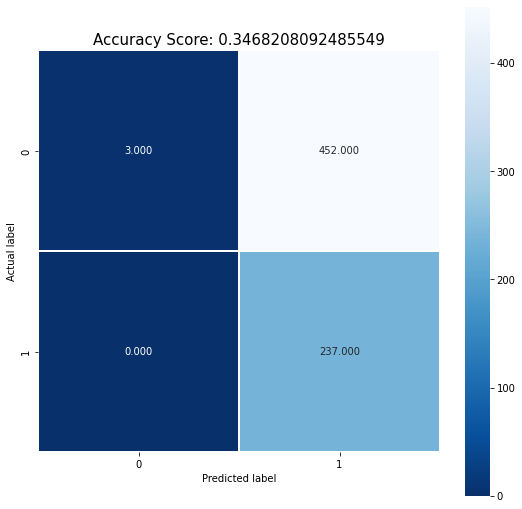

tn: 3 
fp:  452 
fn: 0 
tp: 237


NameError: ignored

In [ ]:
log_result = {'train_params': {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400},
              'train_score': 0.95, 'model': LogisticRegression(max_iter=400), 'test_score': 0.7592190889370932}
knn_result = {'train_params': {'weights': 'uniform', 'p': 3, 'n_neighbors': 3, 'leaf_size': 11, 'algorithm': 'auto'},
              'train_score': 0.8717948717948718, 'model': KNeighborsClassifier(), 'test_score': 0.7532467532467533}

tree_result = {'train_params': {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10},
               'train_score': 0.8818181818181816, 'model': DecisionTreeClassifier(), 'test_score': 0.7541899441340782}
rf_result = {'train_params': {'n_estimators': 455, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 
             'max_depth': 10, 'bootstrap': False}, 'train_score': 0.8717948717948719, 'model': RandomForestClassifier(), 'test_score': 0.7792207792207793}
             
log result :  {'train_params': {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg', 'max_iter': 400}, 'train_score': 0.95, 'model': LogisticRegression(max_iter=400), 'test_score': 0.7592190889370932}

 knn result :  {'train_params': {'weights': 'uniform', 'p': 3, 'n_neighbors': 3, 'leaf_size': 11, 'algorithm': 'auto'}, 'train_score': 0.8717948717948718, 'model': KNeighborsClassifier(), 'test_score': 0.7532467532467533}

 tree result :  {'train_params': {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}, 'train_score': 0.8818181818181816, 'model': DecisionTreeClassifier(), 'test_score': 0.7541899441340782}

 rf result :  {'train_params': {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}, 'train_score': 0.9047619047619048, 'model': RandomForestClassifier(), 'test_score': 0.8}

print_result(result_logic["model"], x_test, y_test)
print(model.get_params, x_test, y_test)
print_result(result_knn["model"], x_test, y_test)
print_result(result_tree["model"], x_test, y_test)
print_result(result_rf["model"], x_test, y_test)

# for miss_flags in [{"drop": 1, "mean": 0, "median": 0, "mode": 0},  {"drop": 0, "mean": 1, "median": 0, "mode": 0}, {"drop": 0, "mean": 0, "median": 1, "mode": 0}, {"drop": 0, "mean": 0, "median": 0, "mode": 1}]:
#   print(miss_flags)
#   new_df = fill_miss_val(df, miss_flags)
#   print(len(new_df))
#   for i in range(1, 10):
#     print("test_size: 0.", i, sep="")
#     for scale_flags in [{"normalize": 0, "standardize": 1}, {"normalize": 1, "standardize": 0}, {"normalize": 0, "standardize": 0}]:
#       print(scale_flags)
#       [x_train, x_test, y_train, y_test] = cal_train_test(new_df, i*0.1, 15, scale_flags)
#       print("Logistic Regression")
#       param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']}
#       model_param = {"max_iter": 1000}
#       # train_model(LogisticRegression(max_iter=200), x_train, y_train, x_test, y_test)
    
#       print("k-Nearest Neighbors")
#       train_model(KNeighborsClassifier(n_neighbors=5), x_train, y_train, x_test, y_test)
#       print("decision tree")
#       train_model(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)
#       print("random forest")
#       train_model(RandomForestClassifier(n_estimators=100), x_train, y_train, x_test, y_test)


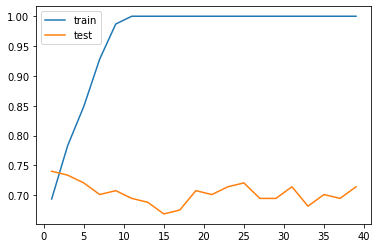

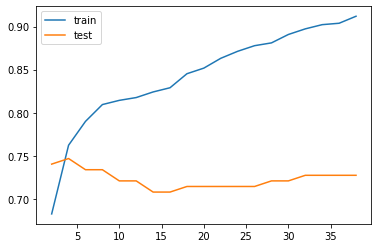

In [11]:
# analys RF
new_df = fill_miss_val(df)
[x_train, x_test, y_train, y_test] = cal_train_test(new_df, 0.2, 15, {"standardize": 0, "normalize": 0})
train_result = []
test_result = []
for max_depth in range(1,40,2):
  rf = RandomForestClassifier(max_depth=max_depth)
  rf.fit(x_train, y_train)
  test_result.append(rf.score(x_test, y_test))
  train_result.append(rf.score(x_train, y_train))

fig, ax = plt.subplots()
ax.plot(range(1,40,2), train_result, label="train")
ax.plot(range(1,40,2), test_result, label="test")
ax.legend()
plt.show()



new_df = fill_miss_val(df)
[x_train, x_test, y_train, y_test] = cal_train_test(new_df, 0.2, 15, {"standardize": 0, "normalize": 0})
train_result = []
test_result = []
for max_leaf_nodes in range(2,40,2):
  rf = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
  rf.fit(x_train, y_train)
  test_result.append(rf.score(x_test, y_test))
  train_result.append(rf.score(x_train, y_train))

fig, ax = plt.subplots()
ax.plot(range(2,40,2), train_result, label="train")
ax.plot(range(2,40,2), test_result, label="test")
ax.legend()
plt.show()

In [ ]:
# logisticRegr = LogisticRegression(solver='lbfgs')
# logisticRegr.fit(x_train, y_train)
# predictions = logisticRegr.predict(x_test)
# score = logisticRegr.score(x_test, y_test)
# print("Accuracy: ", score)
# cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)
# print(y_test.value_counts())
# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15)
# # plt.show()
# tn, fp, fn, tp = cm.ravel()
# print("tn:", tn,"\nfp: ", fp, "\nfn:",fn, "\ntp:",tp)
# print(classification_report(y_test, y_pred))
# print(f'Model Accuracy: {accuracy_score(y_test, predictions):.2f}')
# preds_valid=model.predict(X_valid)
# score_valid=mean_absolute_error(y_valid,preds_valid)
# print("MAE: ",score_valid)

score = 58.25
print('Accuracy Score: {0:.2f}'.format(score))
model = LogisticRegression(max_iter=200)
model.set_params()
list(range(1,50,2))

Accuracy Score: 58.25


[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]